<a href="https://colab.research.google.com/github/akhmad-ardi/Predict_Student_Performance/blob/main/Predict_Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Student Performance

## Import Libraries and Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("stealthtechnologies/predict-student-performance-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/stealthtechnologies/predict-student-performance-dataset/versions/1


In [3]:
df = pd.read_csv(f"{path}/data.csv")

df

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0
...,...,...,...,...,...
1383,0.44549,5.5,8.0,51.0,41.0
1384,0.52466,4.9,6.5,63.0,37.0
1385,0.88197,3.9,6.2,54.0,36.0
1386,0.47336,3.5,7.3,61.0,34.0


## Exploratory Data Analysis(EDA)

1. Apa saja jenis variabel pada dataset?
2. Bagaimana distribusi variabel dalam dataset?
3. Apakah ada missing value?
4. Apakah ada fitur yang tidak berguna (redundant)?
5. Bagaimana korelasi antara fitur dan target?

### Jenis Variabel

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB


Jenis Variabel:
- Socioeconomic Score: Numerik kontinu (skor antara 0 dan 1).
- Study Hours: Numerik kontinu (dalam jam).
- Sleep Hours: Numerik kontinu (dalam jam).
- Attendance (%): Numerik kontinu (persentase kehadiran).
- Grades: Numerik kontinu (nilai akhir).

In [5]:
df.dtypes

,0
Socioeconomic Score,float64
Study Hours,float64
Sleep Hours,float64
Attendance (%),float64
Grades,float64


### Distribusi Variabel

In [6]:
df.describe()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,0.552274,4.560807,8.047262,58.536023,40.691643
std,0.261272,1.897581,1.370700,11.675287,9.467358
min,0.101280,0.800000,4.800000,40.000000,32.000000
25%,0.322118,3.475000,7.000000,49.000000,34.000000
50%,0.545945,3.900000,8.400000,57.000000,35.000000
75%,0.789610,5.900000,9.100000,66.000000,47.000000
max,0.999820,10.000000,10.000000,100.000000,91.000000


Distribusi Variabel:
- Socioeconomic Score:
  - Rentang: 0.10385–0.99982.
  - Distribusi relatif merata dengan beberapa outlier (misalnya, 0.99982).

- Study Hours:
  - Rentang: 0.8–10 jam.
  - Beberapa siswa belajar sangat sedikit (misalnya, 0.8 jam) atau sangat lama (10 jam).

- Sleep Hours:
  - Rentang: 4.8–10 jam.
  - Mayoritas tidur 5–9 jam.
- Attendance (%):
  - Rentang: 40–100%.
  - Terdapat siswa dengan kehadiran sempurna (100%) dan yang sangat rendah (40%).
- Grades:
  - Rentang: 32–91.
  - Nilai tertinggi (91) dan terendah (32) menunjukkan variasi signifikan.

### Miss Value

In [7]:
df.isnull().sum()

,0
Socioeconomic Score,0
Study Hours,0
Sleep Hours,0
Attendance (%),0
Grades,0


Tidak ada miss value

### Outliers

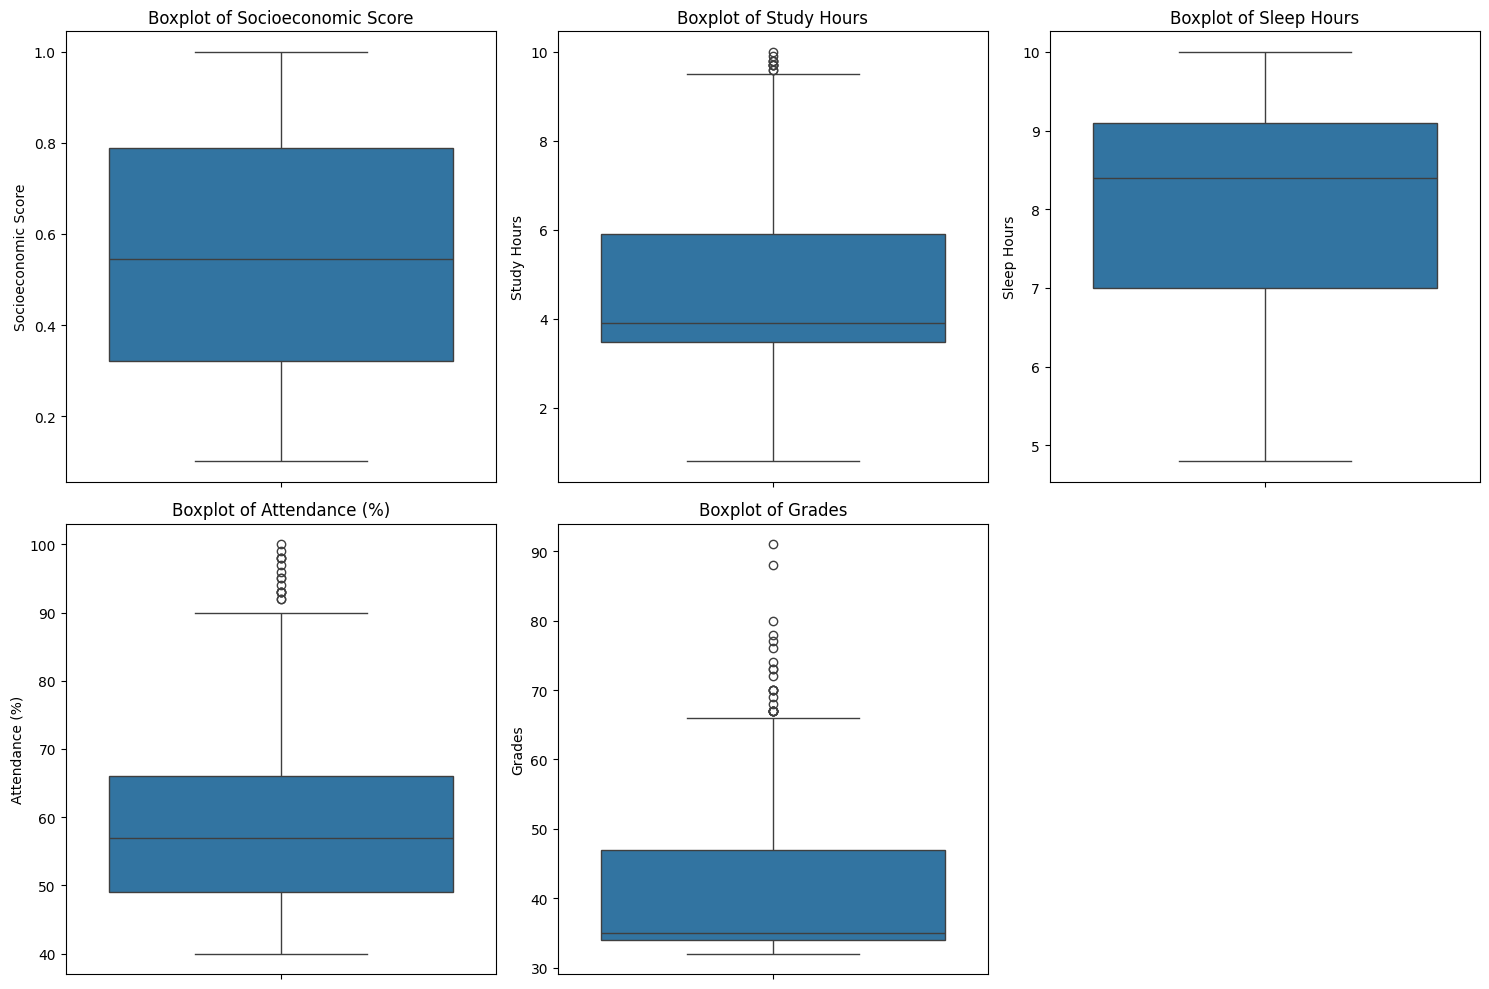

In [8]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(df.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Setelah menghapus outliers, ukuran dataset 1342 rows

### Duplicates

In [9]:
duplicates = df[df.duplicated()]
print(f"Duplicate Rows: {duplicates}")

Duplicate Rows: Empty DataFrame
Columns: [Socioeconomic Score, Study Hours, Sleep Hours, Attendance (%), Grades]
Index: []


### Univariate Analysis

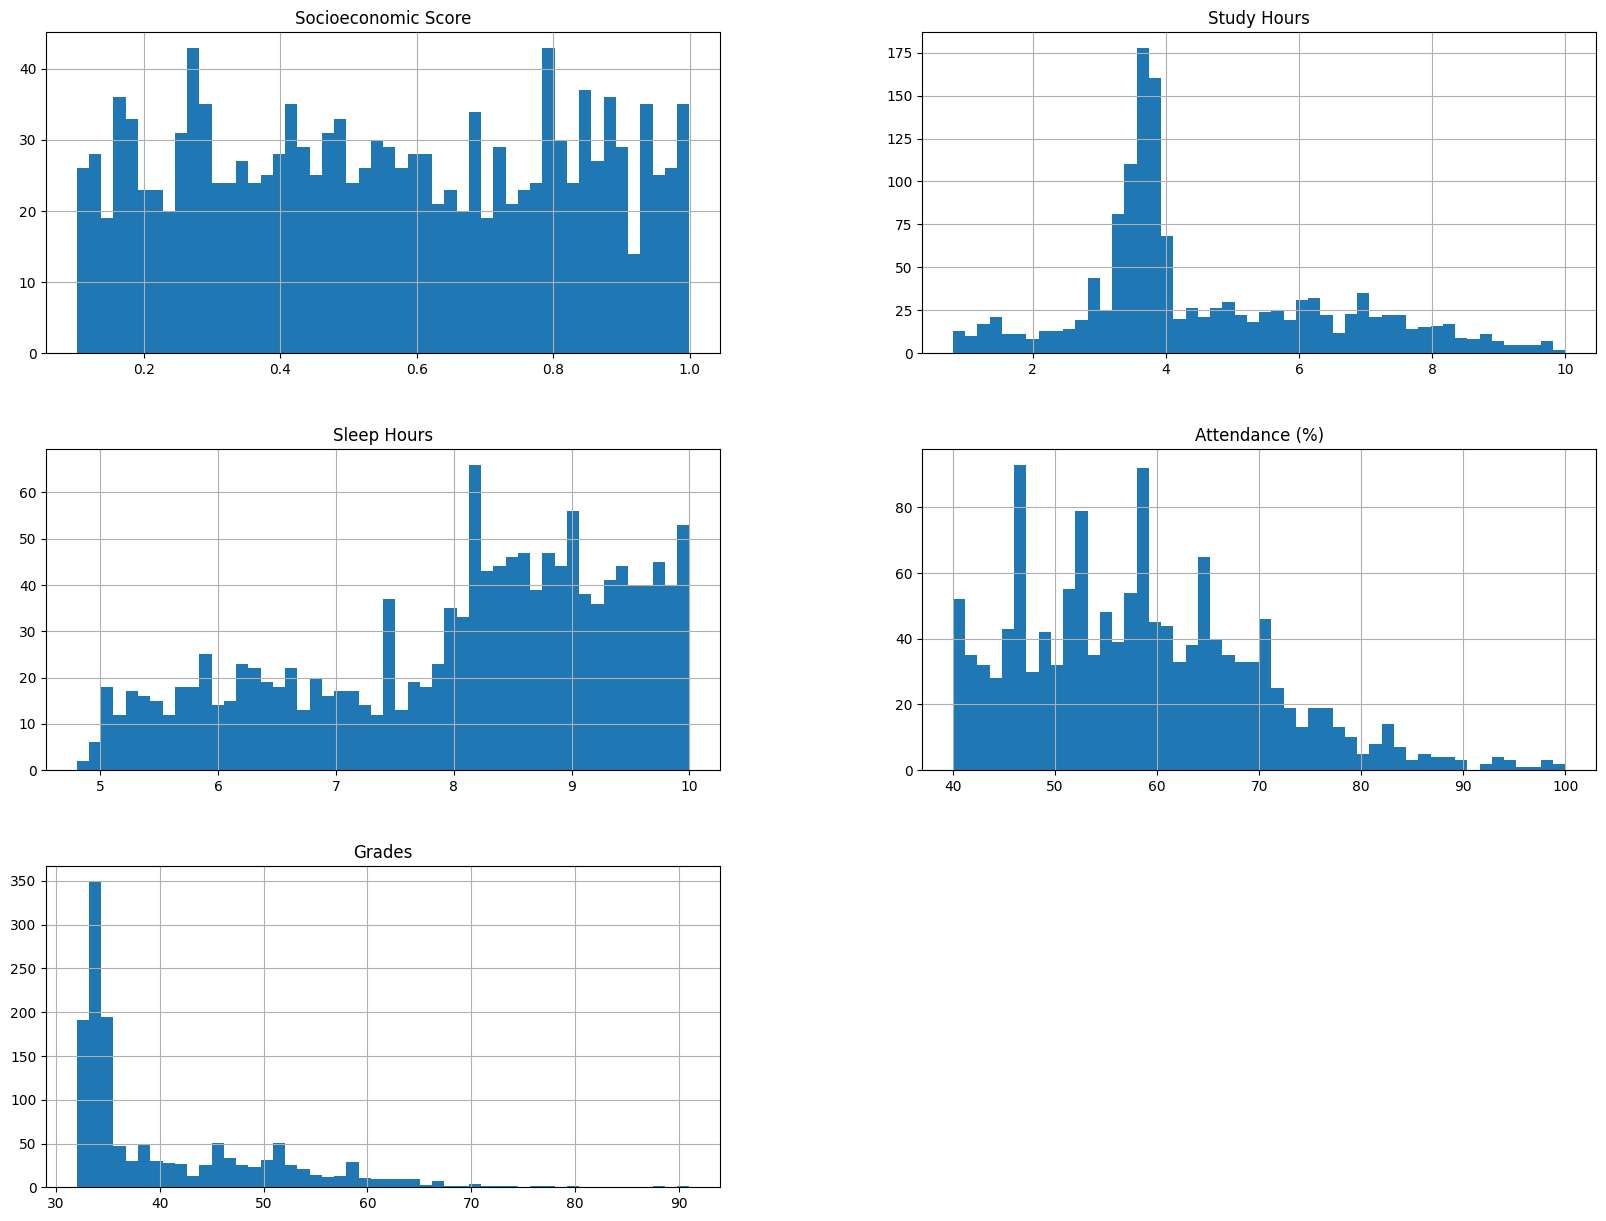

In [10]:
df.hist(bins=50, figsize=(20,15))

plt.show()

### Multivariate Analysis

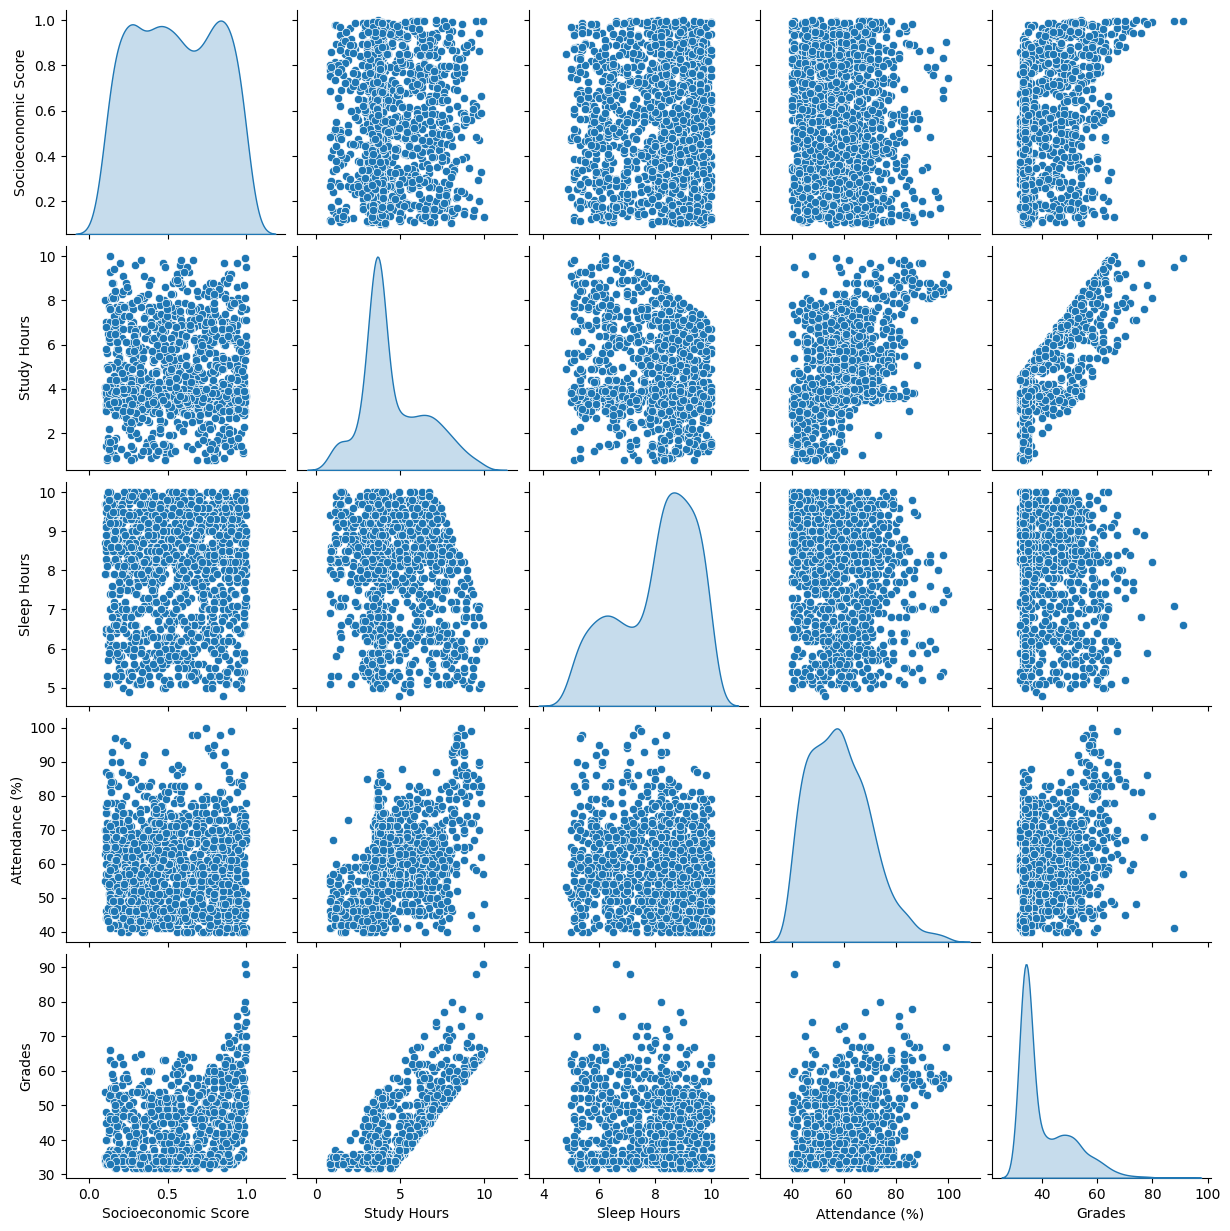

In [11]:
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

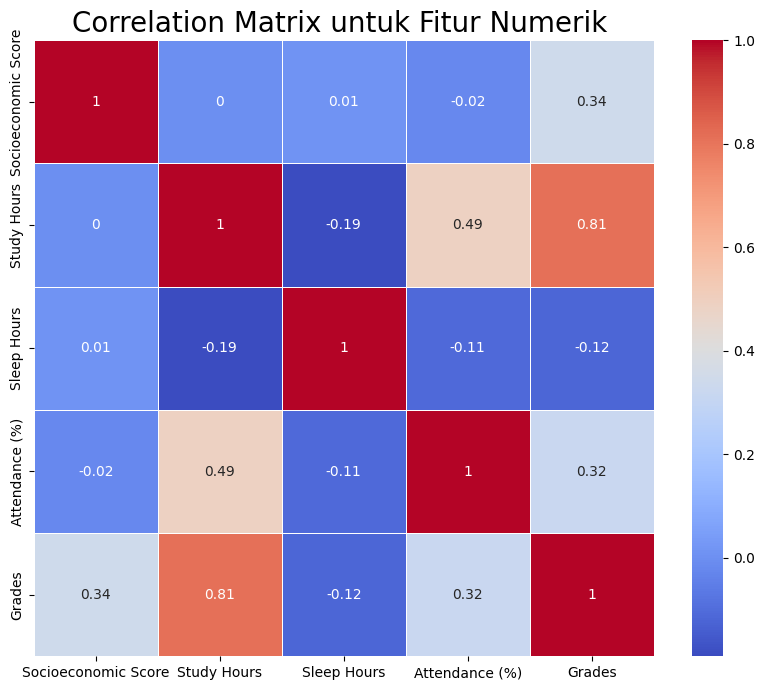

In [12]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

# Untuk print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

## Data Preparation

### Delete outliers

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
cleaned_df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
cleaned_df.shape

(1342, 5)

### Remove unnecessary variables

Sleep Hours memiliki korelasi yang sangat lemah (-0.08) dengan Grades. Jadi Variabel Sleep Hours tidak dibutuhkan.

In [14]:
df.drop(['Sleep Hours'], inplace=True, axis=1)

df.head()

,Socioeconomic Score,Study Hours,Attendance (%),Grades
0,0.95822,3.4,53.0,47.0
1,0.85566,3.2,55.0,35.0
2,0.68025,3.2,41.0,32.0
3,0.25936,3.2,47.0,34.0
4,0.60447,3.8,75.0,33.0


### Split dataset

In [15]:
from sklearn.model_selection import train_test_split

X = cleaned_df.drop(["Grades"],axis =1)
y = cleaned_df["Grades"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [16]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1342
Total # of sample in train dataset: 1207
Total # of sample in test dataset: 135


### Standarization

In [17]:
from sklearn.preprocessing import StandardScaler

features = ['Socioeconomic Score', 'Study Hours', 'Attendance (%)']
scaler = StandardScaler()
scaler.fit(X_train[features])
X_train[features] = scaler.transform(X_train.loc[:, features])
X_train[features].head()

,Socioeconomic Score,Study Hours,Attendance (%)
101,-0.447194,-0.292439,1.951203
1281,-0.088191,-1.875787,-1.269544
855,-0.654534,-0.744824,-0.993480
142,-0.176458,-0.235891,-0.625394
691,0.288000,-0.462083,0.846947


In [18]:
X_train[features].describe().round(4)

,Socioeconomic Score,Study Hours,Attendance (%)
count,1207.0000,1207.0000,1207.0000
mean,0.0000,-0.0000,-0.0000
std,1.0004,1.0004,1.0004
min,-1.7126,-2.0454,-1.6376
25%,-0.8922,-0.5752,-0.8094
50%,-0.0219,-0.3490,-0.0733
75%,0.8948,0.6123,0.7549
max,1.7683,2.8743,2.9634


## Model

In [19]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['Linear Regression', 'KNN', 'RandomForest', 'Boosting'])

### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)

models.loc['train_mse','LinearRegression'] = mean_squared_error(y_pred = LR.predict(X_train), y_true=y_train)

### KNN

In [21]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

### Random Forest

In [22]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=100, max_depth=32, random_state=110, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

### Boosting Algorithm

In [23]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)

models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## Evaluasi Model

In [24]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, features] = scaler.transform(X_test[features])

In [25]:
# Variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['LR', 'KNN','RF','Boosting'])

# Dictionary untuk setiap algoritma yang digunakan
model_dict = {'LR': LR, 'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
LR,0.016927,0.016274
KNN,0.004914,0.00743
RF,0.000221,0.001666
Boosting,0.004736,0.006687


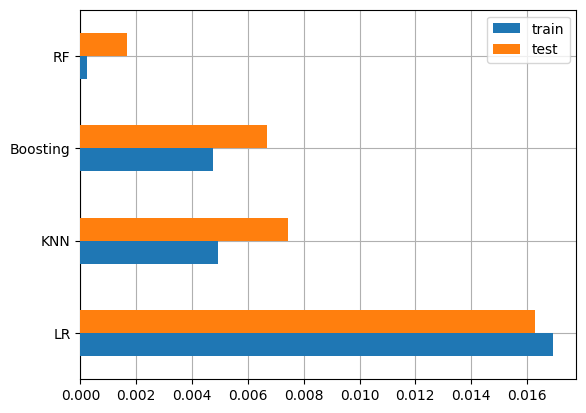

In [26]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Model Random Forest (RF) memberikan nilai error yang paling kecil. Sedangkan model dengan algoritma Linear Regression memiliki error yang paling besar (berdasarkan grafik, angkanya di atas 0.016)

In [27]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_LR,prediksi_KNN,prediksi_RF,prediksi_Boosting
661,35.0,35.5,34.0,33.8,34.5
360,33.0,35.6,33.9,33.9,34.5
18,46.0,41.1,40.6,45.4,48.7
344,34.0,35.8,33.8,33.5,34.5
1359,32.0,34.8,34.0,34.0,34.5
1235,51.0,51.4,52.2,51.9,53.7
1079,49.0,40.4,44.2,48.4,48.0
1159,34.0,35.3,33.7,34.3,34.5
1005,33.0,36.8,34.3,33.7,34.5
326,35.0,35.7,34.1,34.3,34.5
